In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import corner
import fit_separation_distributions

In [2]:
# read in the data
catalog = ascii.read('data/Elbadry_200pc_binaries.csv.gz', format = 'csv')
sep_AU = catalog['s_AU'].data.data  
phot_g_mean_mag2 = catalog['phot_g_mean_mag2'].data.data
phot_g_mean_mag1 = catalog['phot_g_mean_mag'].data.data
parallax = catalog['parallax'].data.data
binary_class = catalog['binary_class'].data.data
contrast = np.abs(phot_g_mean_mag2 - phot_g_mean_mag1)
d_pc = 1000/parallax  
ms_ms = binary_class == 'MSMS'


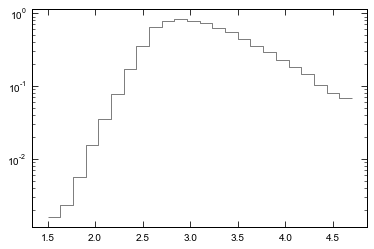

In [3]:
# plot the raw data
plt.hist(np.log10(sep_AU[ms_ms]), bins = np.linspace(1.5, 4.7, 25), histtype = 'step', density = True, color = 'k')
plt.yscale('log')

In [4]:
# fit the separation distribution
# with this number of steps and walkers, this will take ~30 minutes to run. It 
# scales linearly with the number of binaries, so e.g. fitting only those within 100 pc is faster


# here I choose an initial guess that is pretty close to the absolute maximum of the posterior. 
# this prevents walkers from getting stuck. 

# in practice, I ran the MCMC once, chose the sample at which the posterior was maximized, and then
# ran it again using that point as p0. 
p0 = [1.6, 1.8, 3.8]   
p0_bounds = [[0, 2], [1, 3.5], [2, 4.4]]
sampler_double_power_law = fit_separation_distributions.run_mcmc_double_power_law(p0 = p0, theta_bounds = p0_bounds, 
    loga_i = np.log10(sep_AU[ms_ms]), contrast = contrast[ms_ms], d_pc = d_pc[ms_ms], 
    loga_min = -2, loga_max = np.log10(50000), nwalkers = 100, n_steps = 300, burn = 200, nthread = 4)   


initialized walkers... burning in...
completed burn in ...
 3.0%
 6.3%
 9.7%
13.0%
16.3%
19.7%
23.0%
26.3%
29.7%
33.0%
36.3%
39.7%
43.0%
46.3%
49.7%
53.0%
56.3%
59.7%
63.0%
66.3%
69.7%
73.0%
76.3%
79.7%
83.0%
86.3%
89.7%
93.0%
96.3%
99.7%


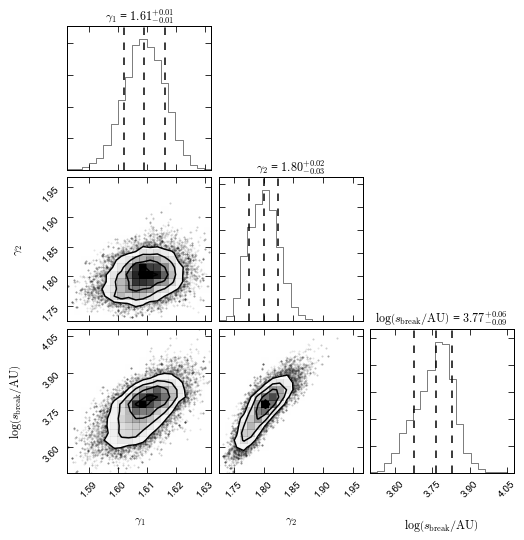

In [5]:
# plot the constraints
label_names = [r'$\gamma_1$', r'$\gamma_2$', r'$\log\left(s_{{\rm break}}/{\rm AU}\right)$'] 
_ = corner.corner(sampler_double_power_law.flatchain, labels = label_names, quantiles=[0.16, 0.5, 0.84],
    show_titles=True, title_kwargs={"fontsize": 12})


**Now, try fitting a single power law over the whole range instead**

initialized walkers... burning in...
completed burn in ...
 3.0%
 6.3%
 9.7%
13.0%
16.3%
19.7%
23.0%
26.3%
29.7%
33.0%
36.3%
39.7%
43.0%
46.3%
49.7%
53.0%
56.3%
59.7%
63.0%
66.3%
69.7%
73.0%
76.3%
79.7%
83.0%
86.3%
89.7%
93.0%
96.3%
99.7%


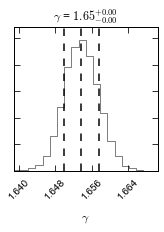

In [6]:
p0 = [1.6]   
p0_bounds = [[0, 2]]
sampler_single_power_law = fit_separation_distributions.run_mcmc_single_power_law(p0 = p0, theta_bounds = p0_bounds, 
    loga_i = np.log10(sep_AU[ms_ms]), contrast = contrast[ms_ms], d_pc = d_pc[ms_ms], 
    loga_min = -2, loga_max = np.log10(50000), nwalkers = 100, n_steps = 300, burn = 200, nthread = 4)   

# plot the constraints
label_names = [r'$\gamma$'] 
_ = corner.corner(sampler_single_power_law.flatchain, labels = label_names, quantiles=[0.16, 0.5, 0.84],
    show_titles=True, title_kwargs={"fontsize": 12})


In [8]:
# what is the likelilhood for the single power law fit vs double power law fit?
lnprob_single_power_law = np.max(sampler_single_power_law.flatlnprobability)
lnprob_double_power_law = np.max(sampler_double_power_law.flatlnprobability)
delta_ln_likelihood = lnprob_double_power_law - lnprob_single_power_law
print(delta_ln_likelihood)

60.0359154872
